In [1]:
import os
from DatasetGeneration import *
from NNPreprocessingAndStructure import *
import torch

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()
# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available, training on: ", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU is available, training on:  NVIDIA GeForce RTX 2070 Super with Max-Q Design


# Training the NN

### Getting data for the NN training

num_timesteps = 500
1/10
ODE solution found: True
2/10
ODE solution found: True
3/10
ODE solution found: True
4/10
ODE solution found: True
5/10
ODE solution found: True
6/10
ODE solution found: True
7/10
ODE solution found: True
8/10
ODE solution found: True
9/10
ODE solution found: True
10/10
ODE solution found: True
Saved: 
10_solutions.npy: (10, 6, 500)
10_F_ag.npy: (10, 500)


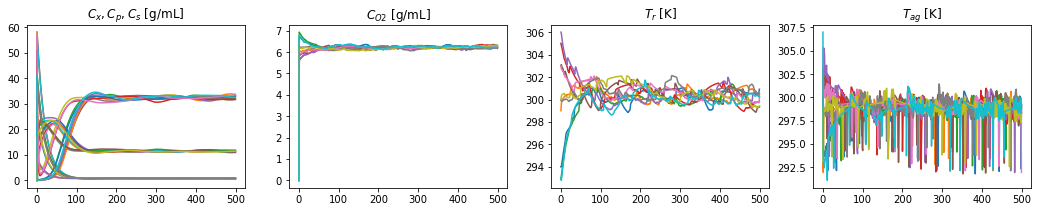

In [2]:
N = 10
solutions_name = str(N) + "_solutions.npy"
F_ag_array_name = str(N) + "_F_ag.npy"
save_dir = "./saved"
os.makedirs (save_dir, exist_ok=True)


train_random_inputs = generate_inputs (N)
solutions, F_ag_array = generate_ode_data(train_random_inputs, num_timesteps=500)

print ("="*50)
print ("Saved: ")
print (f"{solutions_name}: {solutions.shape}")
print (f"{F_ag_array_name}: {F_ag_array.shape}")
print ("="*50)

# SAVE
np.save (join(save_dir, solutions_name), solutions)
np.save (join(save_dir, F_ag_array_name), F_ag_array)

# PLOT
plot_ode_solutions (solutions)

### Visualizing input and output sequences like the paper shows on page ___

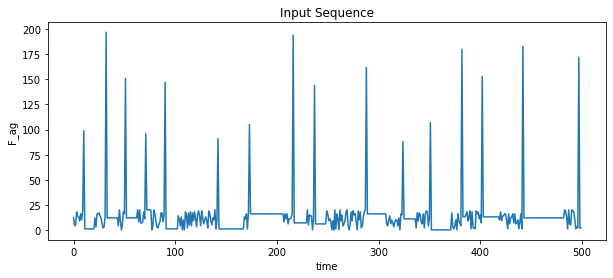

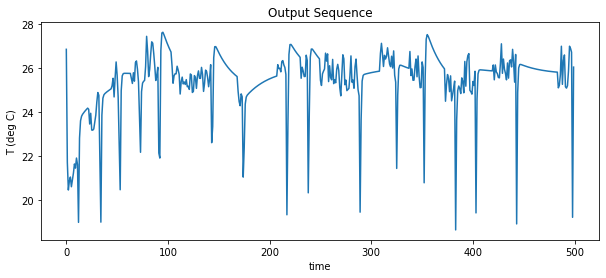

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,4))
plt.title("Input Sequence")
plt.xlabel("time")
plt.ylabel("F_ag")
# plt.xlim(100,500)
plt.plot(F_ag_array[0,:])
plt.show()

plt.figure(figsize=(10,4))
plt.title("Output Sequence")
plt.xlabel("time")
# plt.xlim(100,500)
# plt.ylim(26,34)
plt.ylabel("T (deg C)")
plt.plot(solutions[0][-1].T - 273.15)
plt.show()

iter 0 | loss = 82002.3203125
iter 1 | loss = 65109.9921875
iter 2 | loss = 37183.828125
iter 3 | loss = 5842.9482421875
iter 4 | loss = 14537.9140625
iter 5 | loss = 17762.744140625
iter 6 | loss = 3300.223388671875
iter 7 | loss = 591.3366088867188
iter 8 | loss = 5597.27783203125
iter 9 | loss = 8483.45703125
iter 0 | loss = 8224.501953125
iter 1 | loss = 5097.673828125
iter 2 | loss = 2023.9632568359375
iter 3 | loss = 7.048856258392334
iter 4 | loss = 1122.5587158203125
iter 5 | loss = 3325.03857421875
iter 6 | loss = 3841.2041015625
iter 7 | loss = 1614.9051513671875
iter 8 | loss = 121.66828155517578
iter 9 | loss = 236.8356475830078
iter 0 | loss = 1072.0228271484375
iter 1 | loss = 1515.834228515625
iter 2 | loss = 1440.1015625
iter 3 | loss = 796.4149780273438
iter 4 | loss = 120.81342315673828
iter 5 | loss = 176.47024536132812
iter 6 | loss = 959.4963989257812
iter 7 | loss = 769.3970336914062
iter 8 | loss = 240.20458984375
iter 9 | loss = 2.6648809909820557
iter 0 | loss 

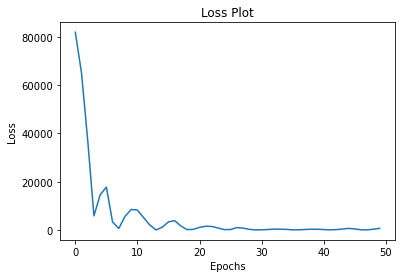

In [4]:
from NNPreprocessingAndStructure import *
train_data = data_preprocessing(solutions, batch_size = 1, shuffle = False)
model = NeuralNet(num_hidden_layers = 2)
train(model, train_data, optimizer = "Adam", num_epochs = 100)

### Testing the NN

num_timesteps = 500
1/1
ODE solution found: True
Saved: 
1test_solutions.npy: (10, 6, 500)
1test_F_ag.npy: (1, 500)


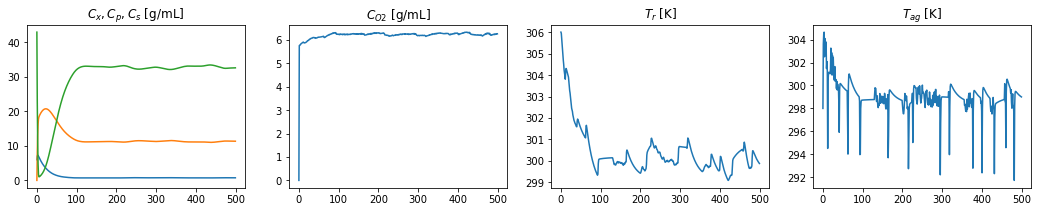

In [5]:
N = 1
solutions_name = str(N) + "test_solutions.npy"
F_ag_array_name = str(N) + "test_F_ag.npy"
save_dir = "./saved"
os.makedirs (save_dir, exist_ok=True)


test_random_inputs = generate_inputs (N)
test_solutions, F_ag_array = generate_ode_data(test_random_inputs, num_timesteps=500)

print ("="*50)
print ("Saved: ")
print (f"{solutions_name}: {solutions.shape}")
print (f"{F_ag_array_name}: {F_ag_array.shape}")
print ("="*50)

# SAVE
np.save (join(save_dir, solutions_name), solutions)
np.save (join(save_dir, F_ag_array_name), F_ag_array)

# PLOT
plot_ode_solutions (test_solutions)

In [9]:
test_data = data_preprocessing(test_solutions, batch_size = 1, shuffle = False)
print(test_data.shape)
test(model, test_data)

AttributeError: 'DataLoader' object has no attribute 'shape'